In [1]:
import tensorflow as tf
from scipy.io import wavfile
from scipy import signal
import os
import matplotlib.pyplot as plt
import numpy as np
from librosa.core import resample, load
from tqdm import tqdm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
classes = ['anxiety', 'baseline', 'concentration', 'digestion', 'disgust', 'frustration']

In [3]:
down_path = '/home/seth/datasets/gut/down'

### Demo high pass filter and noise threshold

In [4]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask


def switch_ix(mask):
    keep_ix = []
    discard_ix = []
    pair = [0]
    
    prev = mask[0]
    for i, current in zip(range(1, len(mask)), mask[1:]):
        if current != prev:
            pair.append(i)
            if prev == True:
                keep_ix.append(pair)
            else:
                discard_ix.append(pair)
            pair = [i]
 
        prev = current
    
    pair.append(i)
    if prev == True:
        keep_ix.append(pair)
    else:
        discard_ix.append(pair)
    
    return keep_ix, discard_ix


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a


def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

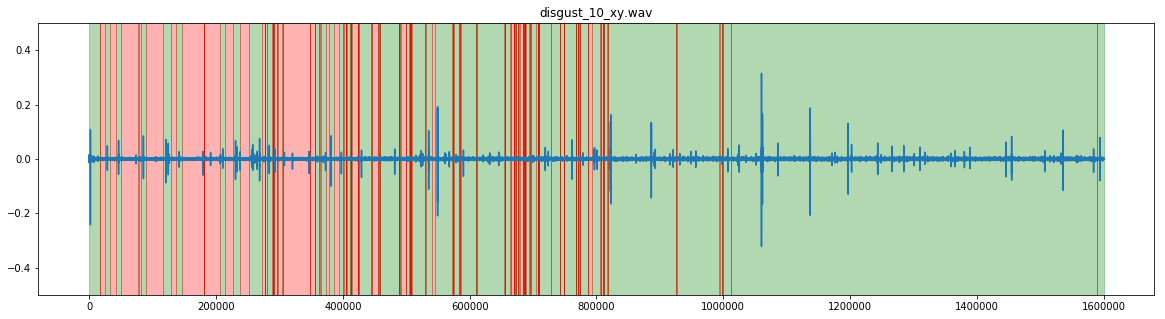

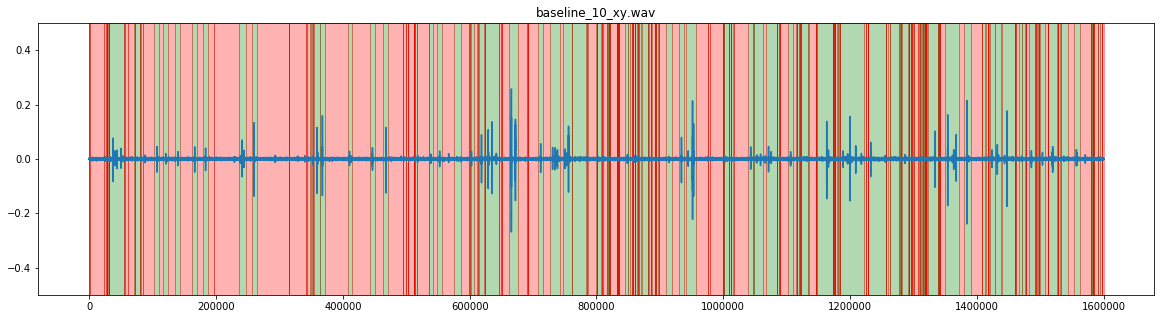

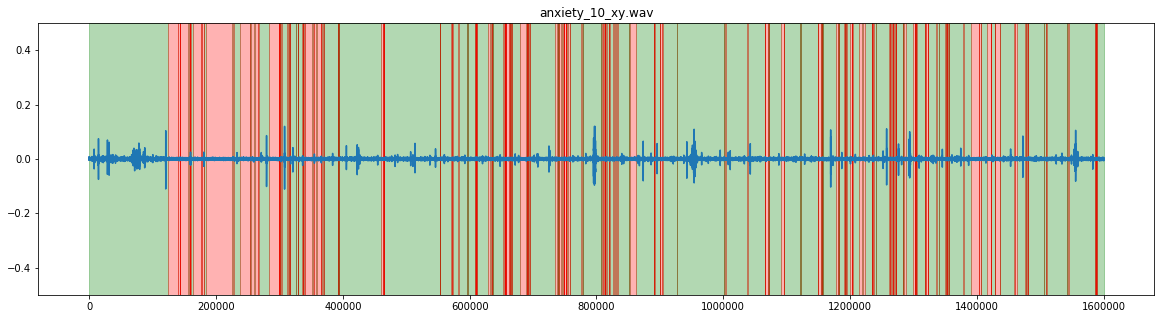

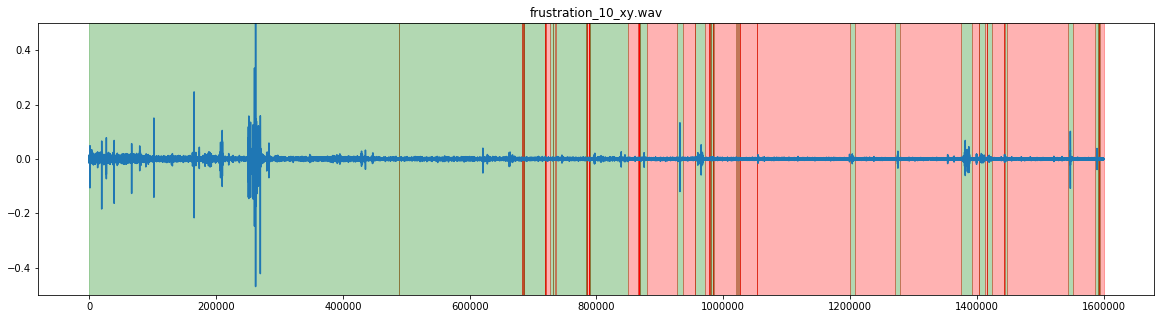

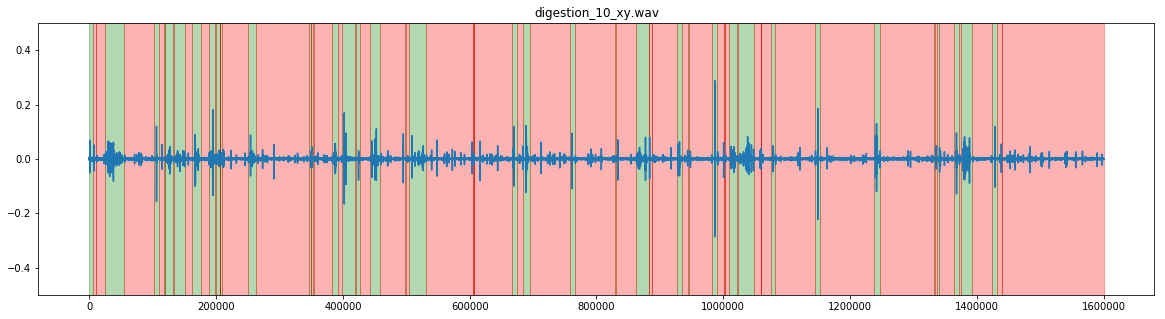

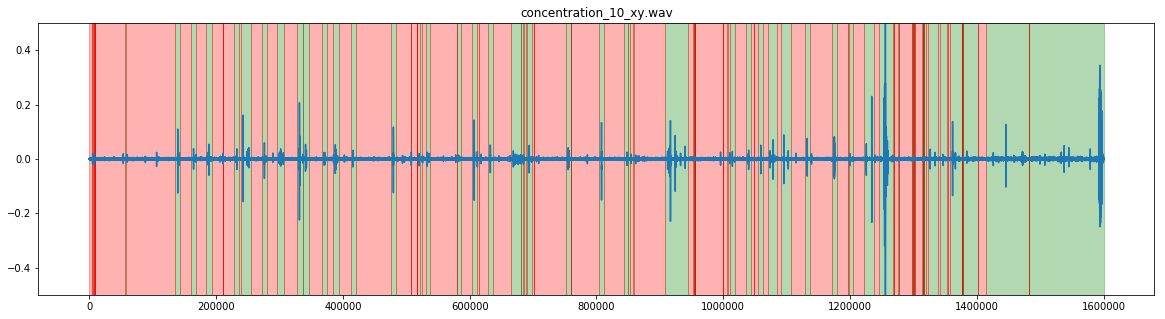

In [5]:
p_dir = 'p10'

for file in os.listdir(os.path.join(down_path, p_dir)):
    #y, rate = load(os.path.join(down_path, 'p6', file))
    rate, y = wavfile.read(os.path.join(down_path, p_dir, file))
    fig, ax = plt.subplots(sharex=True, figsize=(20, 5))
    y = y[:1600000]
    y = butter_highpass_filter(y, 10, 8000)
    mask = envelope(y, rate, 0.0015)
    
    ax.set_title(file)
    ax.plot(y)
    ax.set_ylim([-0.5, 0.5])
    green_ix, red_ix = switch_ix(mask)
    for pair in green_ix:
        ax.axvspan(pair[0], pair[1], alpha=0.3, color='green')
    for pair in red_ix:
        ax.axvspan(pair[0], pair[1], alpha=0.3, color='red')
    plt.show()